In [49]:
import numpy as np

In [50]:
from torch import nn
from torch import Tensor
import torch

In [3]:
# naive version

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(p=dropout)
        self.max_len = max_len


    def forward(self, x: Tensor) -> Tensor:
        '''
        x: Tensor, shape [batch, seq_len, embedding_dim]
        '''
        L = x.shape[1]
        partial_term = torch.outer(torch.arange(L),1/10_000**(torch.arange(torch.ceil(self.d_model/2))*2/d))
        positional_encoding = torch.zeros((L, self.d_model))
        positional_encoding[:,::2] = np.sin(partial_term)
        positional_encoding[:,1::2] = np.cos(partial_term)
        return self.dropout(x + positional_encoding)

# more efficient, buffer for pe version
        

In [53]:

# more efficient, buffer for pe version
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(p=dropout)
        self.max_len = max_len
        L = self.max_len
        partial_term = torch.outer(torch.arange(L),1/10_000**(torch.arange(torch.ceil(self.d_model/2))*2/d))
        positional_encoding = torch.zeros((L, self.d_model))
        positional_encoding[:,::2] = np.sin(partial_term)
        positional_encoding[:,1::2] = np.cos(partial_term)
        self.register_buffer("positional_encoding", positional_encoding)


    def forward(self, x: Tensor) -> Tensor:
        '''
        x: Tensor, shape [batch, seq_len, embedding_dim]
        '''
        L = x.shape[1]

        return self.dropout(x + self.positional_encoding[:L,:])

In [11]:
d = 120      # d and L come from positional encoding
L = 31
delta = np.arange(d)
i = np.arange(L)

In [28]:


partial_term = np.outer(np.arange(L),(1/10000**(np.arange(np.ceil(d/2))*2/d)))

sin_outs = np.sin(partial_term)
cos_outs = np.cos(partial_term)

positional = np.zeros((L,d))
positional[:,::2] = sin_outs
positional[:,1::2] = cos_outs

In [29]:
from matplotlib import pyplot as plt

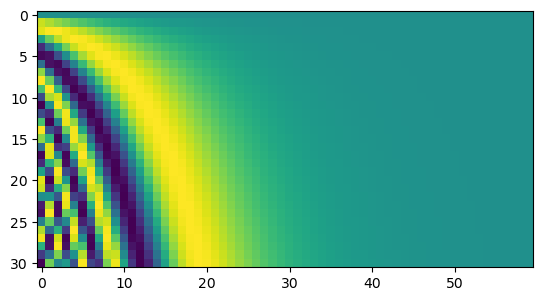

In [30]:
plt.imshow(sin_outs)

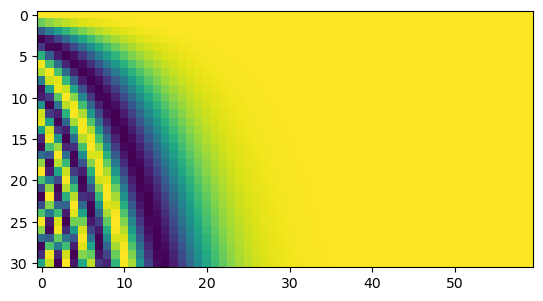

In [32]:
plt.imshow(cos_outs)

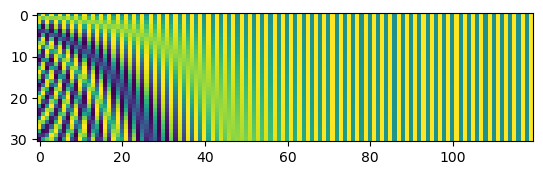

In [47]:
plt.imshow(positional)